In [2]:
import theme
theme.load_style()

# Lesson 4: Plane and Space Trusses

<img src='./Images/truss.d/truss_opening.jpg' style='width:80%'/>

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a>

This lecture by Tim Fuller is licensed under the
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.  All code examples are also licensed under the [MIT license](http://opensource.org/licenses/MIT).

<a id='top'></a>
# Topics

- [Introduction](#intro)
- [Local and Global Coordinates](#loc_glob_coords)
  - [Overview](#lg_overview)
  - [Coordinate Transformation](#coord_trans)
  - [Truss Equations in Global Coordinates](#g_trusseq)
- [Example](#ex1)
  - [Element Connectivity](#el_conn_ex1)
  - [Boundary Conditions](#bcs_ex1)
  - [Solution](#sol_ex1)
- [Computational Implementation](#computational_implementation)

# <a id='intro'></a> Introduction[<img src='./Images/top.png' style='width:20px;vertical-align:middle;float:right'/>](#top)

<img src="Images/truss.d/truss_or_frame.png" style='width:80%'/>

Are the above structures frames or trusses?

**Frame**

- Carries transverse and bending loads
- Members are connected rigidly

**Truss**

- Members only carry axial loads (no transverse shearing or bending)
- Members are connected by pins that allow free rotation 

Because of their pin connections, individual members of truesses support only axial loads, as shown below.

<img src='./Images/truss.d/truss_axial.png' style='width:80%'/>

Because of this property, members of trusses are termed "two force" members.  Importantly, though members in a truss support only loads along their axis, the truss is capable of supporting loads in the $XY$ plane (2D plane trusses) or $XYZ$ space (3D space trusses).  This gives rise to the notion of a "local" coordinate system for individual members and a a "global" coordinate system for the truss.  In general, force-displacement relationships for members are formulated in their local coordinate system and transformed to the global truss coordinate system where they are solved.  The remainder of this chapter will focus on formulating and solving these systems of equations for trusses.

# <a id='loc_glob_coords'></a> Local and Global Coordinate Systems[<img src='./Images/top.png' style='width:20px;vertical-align:middle;float:right'/>](#top)

## <a id='lg_overview'></a> Overview

A member of a truss is a 1D two-force member embedded in a 2D (plane truss) or 3D (space truss) coordinate system, as shown below.  In their local coordinates ($\hat{x}$, $\hat{y}$), members of a truss experience forces and displacements in only their local $\hat{x}$ direction.  When viewed in the global coordinates, members experience forces and displacements in the $x$ and the $y$ coordinate directions.

To accomodate the extra dimensionality, rows and columns of zeros are inserted in the local element stiffness equation corresponding to the (non-existent) forces and displacements in the local $\hat{y}$ direction.

<table id="mytable" border=0>
<tr>
<td rowspan='2'> <img src='./Images/truss.d/u_lgcoords.png'/></td>
<td style="height:50%"> 
<div class="msg">1D element coordinate system</div>
  $$ 
  \begin{Bmatrix} f_{i\hat{x}} \\ f_{j\hat{x}} \end{Bmatrix} =
  k^{(e)}\begin{bmatrix} 1 & -1 \\ -1 & 1 \end{bmatrix}
  \begin{Bmatrix} u_{i\hat{x}} \\ u_{j\hat{x}} \end{Bmatrix}
  $$
</td>
</tr>
<tr>
<td style="height:50%"> 
<div class="msg">2D element coordinate system</div>
  $$ 
  \begin{Bmatrix} 
    f_{i\hat{x}} \\ f_{i\hat{y}} \\ f_{j\hat{x}} \\ f_{j\hat{y}}
  \end{Bmatrix} =
  k^{(e)}\begin{bmatrix} 
    1 & 0 & -1 & 0 \\ 
    0 & 0 & 0 & 0 \\
    -1 & 0 & 1 & 0 \\
     0 & 0 & 0 & 0 \\
  \end{bmatrix}
  \begin{Bmatrix} 
    u_{i\hat{x}} \\ u_{i\hat{y}} \\ u_{j\hat{x}} \\ u_{j\hat{y}} 
  \end{Bmatrix}$$
</td>
</tr>
</table>

Casting the local equations in the global 2D system requires a change of coordinates by means of [Coordinate Transformations](#coord_trans).

## <a id="coord_trans"></a> Coordinate Transformation

Consider the vector $\boldsymbol{v}$ represented in a local coordinate system ($\hat{x},\hat{y}$) embedded in a global coordinate system ($x,y$).

<img src="Images/truss.d/coord_trans_2.png"/>

The components of $\boldsymbol{v}$ in the local coordinate system $v_{\hat{x}}$ and $v_{\hat{y}}$ are related to the components $v_x$ and $v_y$ in the global coordinates by

$$
\begin{align}
v_x &= v_{\hat{x}} \cos \theta - v_{\hat{y}} \sin \theta \\
v_y &= v_{\hat{x}} \sin \theta + v_{\hat{y}} \cos \theta
\end{align}
$$

In matrix form, we say

$$
\begin{Bmatrix} v_x \\ v_y \end{Bmatrix} = 
\begin{bmatrix} 
\cos \theta & -\sin \theta \\ \sin \theta & \cos \theta 
\end{bmatrix}
\begin{Bmatrix} v_{\hat{x}} \\ v_{\hat{y}} \end{Bmatrix}
$$

we recognize 

$$
R_{ij} = \begin{bmatrix} 
\cos \theta & -\sin \theta \\ \sin \theta & \cos \theta 
\end{bmatrix}
$$

as the familiar rotation matrix.

The components of displacement and force in the local coordinates transform similarly.  In compact notation we right

<table id="mytable" border=0> 
<tr> 
<td rowspan="2"> <img src="Images/truss.d/u_lgcoords.png"/> </td>
<td style="height:50%">
<div class="msg">Displacement relationship</div>
$$
\begin{align}
u_{ix} &= u_{i\hat{x}} \cos \theta - u_{i\hat{y}} \sin \theta \\
u_{iy} &= u_{i\hat{x}} \sin \theta + u_{i\hat{y}} \cos \theta \\
u_{jx} &= u_{j\hat{x}} \cos \theta - u_{j\hat{y}} \sin \theta \\
u_{jy} &= u_{j\hat{x}} \sin \theta + u_{j\hat{y}} \cos \theta
\end{align}
$$
</td>
</tr>
<tr>
<td style="height:50%">
<div class="msg">Force relationship</div>
$$
\begin{align}
f_{ix} &= f_{i\hat{x}} \cos \theta - f_{i\hat{y}} \sin \theta \\
f_{iy} &= f_{i\hat{x}} \sin \theta + f_{i\hat{y}} \cos \theta \\
f_{jx} &= f_{j\hat{x}} \cos \theta - f_{j\hat{y}} \sin \theta \\
f_{jy} &= f_{j\hat{x}} \sin \theta + f_{j\hat{y}} \cos \theta
\end{align}
$$
</td>
</tr>
</table>

In matrix notation, we write

$$
\begin{Bmatrix} u_{ix} \\ u_{iy} \\ u_{jx} \\ u_{jy} \end{Bmatrix} = 
\begin{bmatrix} 
\cos \theta & -\sin \theta & 0 & 0 \\ 
\sin \theta & \cos \theta & 0 & 0 \\
0 & 0 & \cos \theta & -\sin \theta \\ 
0 & 0 & \sin \theta & \cos \theta 
\end{bmatrix}
\begin{Bmatrix} u_{i\hat{x}} \\ u_{i\hat{y}} \\ u_{j\hat{x}} \\ u_{j\hat{y}} \end{Bmatrix}
$$

and similarly for the force.

<div class="msg msg-info">
<b>Remark</b><br>
Each node now has 2 degrees of freedom
</div>

<div class="msg msg-info">
<b> Remark </b> <br>
 
Note the ordering of the nodal displacements for the now multi-DOF displacement array above, repeated here

$$
\begin{Bmatrix} 
u_{1x} \\ 
u_{1y} \\ 
u_{2x} \\ 
u_{2y} \\
\vdots \\
u_{nx} \\ 
u_{ny} \\ 
\end{Bmatrix}
\begin{matrix} 
\longleftarrow 1^{\text{st}} \text{ and } 2^{\text{nd}} \text{ DOF for node 1} \\[8pt]
\longleftarrow 1^{\text{st}} \text{ and } 2^{\text{nd}} \text{ DOF for node 2} \\[7pt]
\vdots \\[7pt]
\longleftarrow 1^{\text{st}} \text{ and } 2^{\text{nd}} \text{ DOF for node n}
\end{matrix}
$$

Other node ordering schemes exit, such as

$$
\begin{Bmatrix} 
u_{1x} \\ 
u_{2x} \\ 
\vdots \\
u_{nx} \\
u_{1y} \\ 
u_{2y} \\
\vdots \\
u_{ny} \\ 
\end{Bmatrix}
$$

Each ordering technique has its merit.  In this course, we adopt the former ordering method.

With the chosen array ordering, the global degree of freedom $DOF$ of the local degree of freedom $dof$ of node $i$ is given by
<br>

$$DOF = 2i + dof$$
</div>

## <a id='g_trusseq'></a> Truss Equations in the Global Coordinates[<img src='./Images/top.png' style='width:20px;vertical-align:middle;float:right'/>](#top)

Returning to the force displacement relationships.  The transformation from local to global coordinates for the displacement and force arrays is given by

$$
\{u\} = [T]\{\hat{u}\}
$$
$$
\{f\} = [T]\{\hat{f}\}
$$

where

$$
T = \begin{bmatrix}
\cos \theta & -\sin \theta & 0 & 0 \\
\sin \theta & \cos \theta & 0& 0 \\
0 & 0 & \cos \theta & -\sin \theta \\
0 & 0 & \sin \theta & \cos \theta
\end{bmatrix}
$$

In the local coordinates, recall that

$$
\{\hat{f}\} = [\hat{k}] \{\hat{u}\}
$$

or,

$$
\{\hat{f}\} = [T]^{-1} \{f\} = [\hat{k}] \{\hat{u}\} = [\hat{k}] [T]^{-1} \{u
\}$$

which simplifies to

$$
\{f\} = [T] \{\hat{u}\} [T]^{-1} \{u\}
$$

or

$$
\{f\} = [k] \{u\}
$$

where

$$
[k] = [T] \{\hat{k}\} [T]^{-1}
$$

You'll recall from linear algebra that $[T]$ is orthogonal, so $[T]^{-1} = [T]^{T}$

Following through on the multiplication leads to 

$$
[k] = \hat{k}\begin{bmatrix} \cos^{2} \theta & \sin \theta \cos \theta  & -\cos^{2} \theta & -\sin \theta \cos \theta \\ \sin \theta \cos \theta & \sin^{2} \theta & - \sin \theta \cos \theta & - \sin^{2} \theta \\ - \cos^{2} \theta & - \sin \theta \cos \theta & \cos^{2} \theta & \sin \theta \cos \theta \\ - \sin \theta \cos \theta & - \sin^{2} \theta & \sin \theta \cos \theta & \sin^{2} \theta\end{bmatrix}
$$

It turns out that $[k]$ has the same structure as $[\hat{k}]$, namely

$$
[k] = \hat{k}\begin{bmatrix} a & b \\ -b & a \end{bmatrix}
$$

In $[\hat{k}]$, $a=b=1$ whereas in $[k]$, $a$ and $b$ are matrices.  Being that the two views of the element stiffness have the same structure, the assembly of the components in to the global stiffness also has the same structure, as shown in the images below for five element structures in 1 and 2D.

<table id="mytable">
<tr>
  <td>
    <img src="./Images/truss.d/assembly-1.png" style='width:80%'/>
  </td>
  <td>
    <img src="./Images/truss.d/assembly-2.png" style='width:80%'/>
  </td>
</tr>
</table>

Note that the assembly procedure is the same and that, generally speaking, the shape of $[K]$ is $n_{\text{dof}}^{\text{sys}} \times n_{\text{dof}}^{\text{sys}}$, $n_{\text{dof}}^{\text{sys}} = n\cdot n_{\text{dof}}^{\text{n}}$ where $n$ and $n_{\text{dof}}^{\text{n}}$ are the number of nodes and the number of degrees of freedom per node, respectively.  We see then that the assembly procedure in 1D is just a special case of the assembly procedure in 2D (any D, really).  We'll see how to exploit this fact to generalize our existing finite element solver to solve systems in multiple dimensions.

### Alternative Method of Assembling $[k]$

It turns out that we need to explicitly compute all the $\theta$ to compute $[k]$.  Recall

<img src="Images/truss.d/normal.png"/>

So, 

$$
[k] = [T] [\hat{k}] [T]^{T} = \hat{k}\begin{bmatrix} 
n_{x}^{2} & n_{x} n_{y} & -n_{x}^{2} & -n_{x} n_{y}\\
n_{x} n_{y} & n_{y}^{2} & -n_{x} n_{y} & -n_{y}^{2}\\
-n_{x}^{2} & -n_{x} n_{y} & n_{x}^{2} & n_{x} n_{y}\\
-n_{x} n_{y} & -n_{y}^{2} & n_{x} n_{y} & n_{y}^{2}
\end{bmatrix}
$$

The matrix above can be computed from the *outer product* of $\boldsymbol{n}$ with itself.  The outer product (often called the dyadic product) is denoted in some texts as $\boldsymbol{a} \otimes \boldsymbol{b}$ and is defined as

$$
\boldsymbol{C} = \boldsymbol{a} \otimes \boldsymbol{b}
\qquad C_{ij} = a_i b_j
$$

#### Calculating Element Unit Vectors

Exactly how do we calculate the unit vectors needed by the previous relationship?  Consider the following truss, in particular element 3

<img src="Images/truss.d/elem_vec_length.png" style='width:80%'/>

The nodes $i$ and $j$ associated with each element come from the element connectivity table.  $x_i$ and $x_j$ come from the table of nodal coordinates.

The element direction vector is given by

$$
v^{(3)} = x_j - x_i
$$

and the element length is

$$
l^{(3)} = || v^{(3)} || = \sqrt{v^{(3)} \cdot v^{(3)}} = \sqrt{v_x^2 + v_y^2}
$$

Finally, the element unit vector is

$$
n^{(3)} = \frac{v^{(3)}}{l^{(3)}}
$$

# <a id='ex1'></a> Example[<img src='./Images/top.png' style='width:20px;vertical-align:middle;float:right'/>](#top)

Let's put it together with an example.  Let us consider the following truss.  We begin as with the 1D problems by analyzing the element connectivity and determining boundary conditions

<img src="Images/truss.d/truss_ex_5.jpg" style='width:80%'/>

## <a id='el_conn_ex1'></a> Element Connectivity

Assembling the stiffness matrix is analogous to assembling 1D systems.  We use a connectivity table as before

| Element Number  | Node i | Node j |
| :-------------: |:------:| :-----:|
| 1               | 1      | 3      | 
| 2               | 1      | 2      |

## <a id='bcs_ex1'></a> Boundary Conditions

### Pinned Boundary Conditions

The boundary conditions on the nodes 2 and 3 are examples of pinned boundary conditions - not allowing moving in the $x$ or the $y$ directions.  Or, $u_{2x} = u_{2y} = u_{3x} = u_{3y} = 0$.

### Roller Boundary Conditions

The boundary condition on $x$ dof of node 1 is an example of a roller boundary condition.  The displacement $u_{1y}$ is a model *unknown*

### Displacement Boundary Conditions

The boundary condition on the $y$ dof of noe 1 is an example of a displacement boundary condition.  The displacement $u_{1y} = -\delta$.

### Force Boundary Conditions

A nodal force is applied at node 1: $f_{1x} = -P$

## <a id='sol_ex1'></a> Solution

The solution to the above problem is worked out in the computational cell below.  One new thing to note is the use of the `femlib.viewer.display_truss` method that produces plots of truss members.  See the usage below and the `femlib.viewer.display_truss` docstring for details.  Also note the use of `-1` in the call to `np.reshape`.  See the `numpy` [reshape](http://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) documentation for details.

In [2]:
import numpy as np
from sympy import symbols, cos, sin, init_printing, Matrix
init_printing()

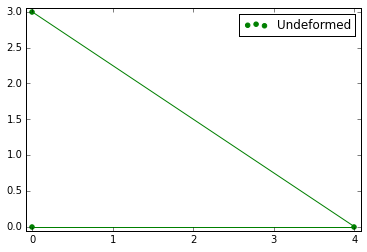

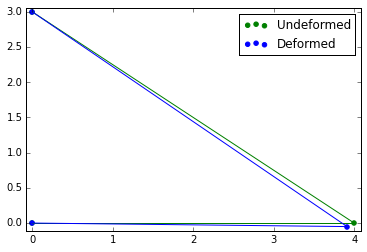

[[ -8.82842026e-02  -5.00000000e-02]
 [ -7.72486772e-25   0.00000000e+00]
 [ -2.27513228e-25   1.70634921e-25]]


In [3]:
# allows plots to be displayed inline
%matplotlib inline
from femlib.viewer import display_truss

num_node = 3
num_dof_per_node = 2
num_elem = 2
num_dof = num_node * num_dof_per_node

# vertices[i,j] is the jth coordinate of the ith node
node_map = [1, 2, 3]
vertices = np.array([[4., 0.], 
                     [0., 3.], 
                     [0., 0.]])

# connect[i,j] is the jth node number of the ith element
connect = np.array([[1, 1, 3], [2, 1, 2]])

# material properties
E, A = 70E+09, 5 * .01 * .01

# Load
P = 1000E+03

# Boundary conditions
delta = .05

# Element 1 stiffness
v1 = vertices[0] - vertices[1]
l1 = np.sqrt(np.dot(v1, v1))
n1 = v1 / l1
n1n1 = np.outer(n1, n1)
k1 = A * E / l1 * n1n1

# Element 2 stiffness
v2 = vertices[0] - vertices[2]
l2 = np.sqrt(np.dot(v2, v2))
n2 = v2 / l2
n2n2 = np.outer(n2, n2)
k2 = A * E / l2 * n2n2

# Global stiffness
K = np.zeros((num_dof, num_dof))

# Element 1 contribution to global stiffness.  Note, that
# K1 is a 2x2 so that we are adding in the full 4x4 element
# stiffness to the global stiffness
i, j = connect[0] - 1
I, J = num_dof_per_node * i, num_dof_per_node * j
K[I:I+2, I:I+2] += k1
K[J:J+2, J:J+2] += k1
K[I:I+2, J:J+2] -= k1
K[J:J+2, I:I+2] -= k1

# Element 2 contribution to global stiffness
i, j = connect[1] - 1
I, J = num_dof_per_node * i, num_dof_per_node * j
K[I:I+2, I:I+2] += k2
K[J:J+2, J:J+2] += k2
K[I:I+2, J:J+2] -= k2
K[J:J+2, I:I+2] -= k2

# Global force
F = np.zeros(num_dof)

# -P applied to node 1 in x direction
node, dof = 0, 0
F[num_dof_per_node * node + dof] = -P

# Apply boundary conditions via penalty method
X = 1.e30
Kbc = K.copy()
Fbc = F.copy()

# node 1: -delta applied in y direction
Kbc[1,1] = X
Fbc[1] = -delta * X

# nodes 2,3: 0 applied to x,y directions
Kbc[2,2] = Kbc[3,3] = Kbc[4,4] = Kbc[5,5] = X
Fbc[2] = Fbc[3] = Fbc[4] = Fbc[5] = 0

# Solve for displacement
u = np.linalg.solve(Kbc, Fbc)

# Find reactions
r = np.dot(K, u) - F

# Updated nodal positions
x = vertices + u.reshape((num_node, -1))

# Display the truss
display_truss(vertices, connect)

# display the results
display_truss(vertices, connect, overlay=x, oc="b", ol="Deformed")

print u.reshape((num_node, -1))

# <a id='computational_implementation'></a> Computational Implementation[<img src='./Images/top.png' style='width:20px;vertical-align:middle;float:right'/>](#top)

Would it be possible to modify `oned.solve_system` in such a way that it would be able to solve a truss problem and still be compatible with our `uniform_bar` and `tapered_bar` applications?  Yes!  And it requires only a slight modification to the assembly procedures to boot.

Let's investigate the current `oned.solve_system` code and identify places where it will need to be modified, starting with the assembly of the global stiffness

<table id="mytable">
<tr> <td style="width:65%">
<pre>
K = np.zeros((num_dof, num_dof))
for (el, nodes) in enumerate(connect):
    i = dof_map(nodes[0])
    j = dof_map(nodes[1])
    K[i, i] += k[el]
    K[j, j] += k[el]
    K[i, j] -= k[el]
    K[j, i] -= k[el]
</pre>
</td>
<td> <div class="msg">
<p><strong> Note </strong></p>
The implicit assumption that k[el] is a scalar is made in the algorithm.  For problems in more than 1 dimension (like a plane truss), k[el] is instead a matrix.
</div>
</td>
</tr>
</table>

The question then arises: how do we modify the above algorithm to allow for `k[el]` to be a matrix?  The answer is quite simple, change the left hand side of the assignment, e.g, `K[i, i] += k[el]` to use the appropriate slice of `K` and not just a single index.  The details are left as an exercise at the end of the chapter.

<div class="msg msg-success">
It turns out the modifying the global stiffness assembly is the only change needed to convert our existing code to work with trusses!
</div>